# Linear Neural Networks

This notebook demonstrates three fundamental concepts in supervised learning:
1. Linear regression from scratch with gradient descent.
2. Bias-Variance trade-off illustrated with polynomial regression.
3. Binary classification with logistic regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

sns.set(style="whitegrid")
sns.set_context("talk")

## Linear Regression with Gradient Descent

We start by generating synthetic data and fitting a simple linear regression model using gradient descent.

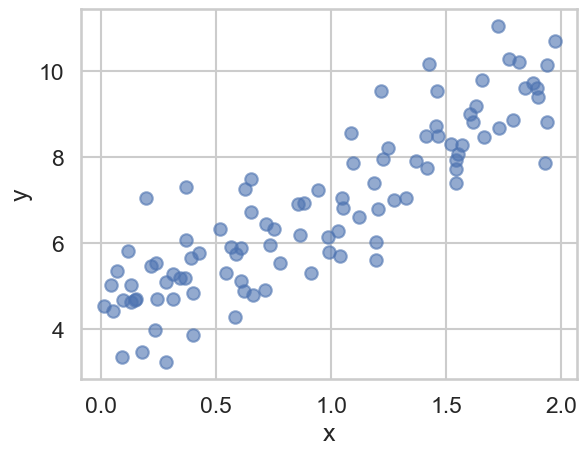

b: 4.181460978025091
w: 2.7998114172192703


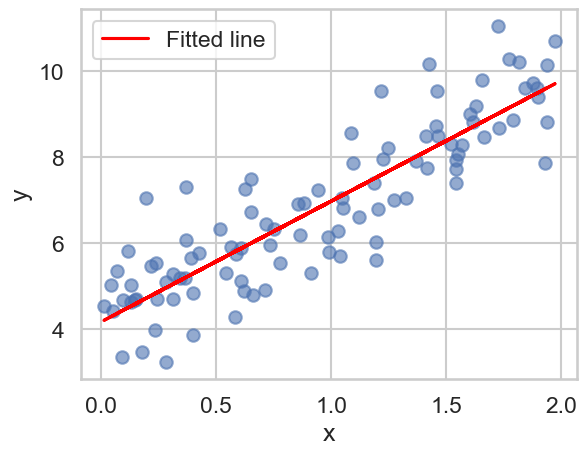

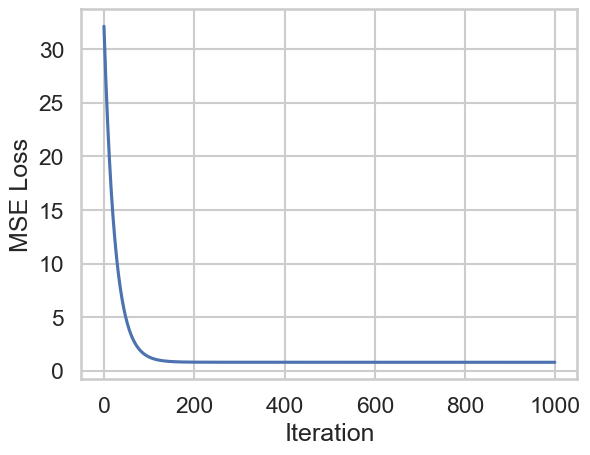

In [ ]:
# Generate some random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  #errore casuale

# Scatter plot of data
plt.scatter(X, y, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Initialize parameters
w = np.random.randn()
b = np.random.randn()

# Gradient descent loop
losses = []
for iteration in range(num_iterations):
    y_pred = b + w * X
    loss = np.mean((y_pred - y) ** 2)  # Mean Squared Error
    losses.append(loss)

    # Gradients
    db = np.mean(y_pred - y)
    dw = np.mean((y_pred - y) * X)

    # Parameter updates
    b -= learning_rate * db
    w -= learning_rate * dw

# Final parameters
print("b:", b)
print("w:", w)

# Plot fitted line
plt.scatter(X, y, alpha=0.6)
plt.plot(X, b + w * X, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Plot convergence
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.show()

## Bias-Variance Trade-off

We use polynomial regression with different degrees to illustrate underfitting, good fit, and overfitting.

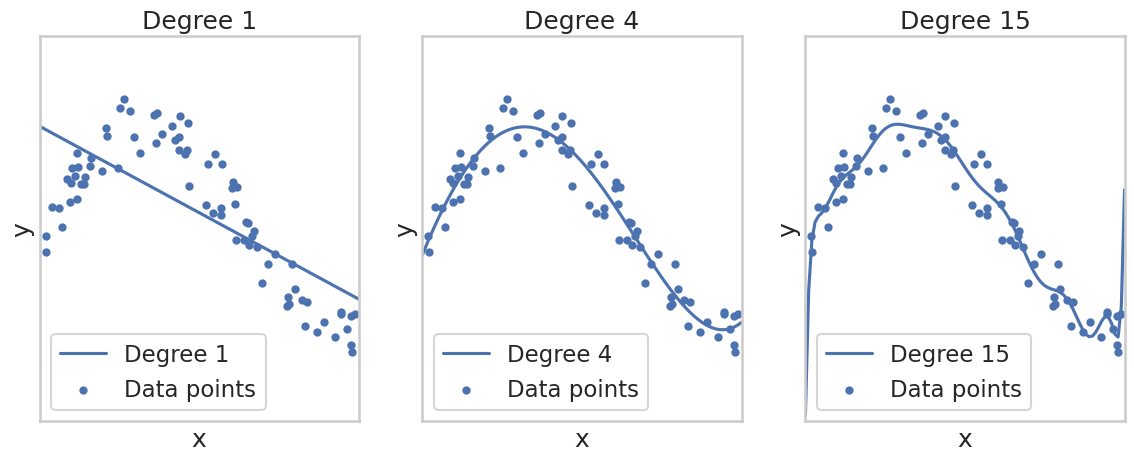

In [ ]:
# Generate synthetic data
np.random.seed(0)
X = np.sort(np.random.rand(80, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    pipeline = make_pipeline(PolynomialFeatures(degree=degree),   #make_pipeline creates a pipeline that sequentially applies a list of transforms and a final estimator
                             StandardScaler(),
                             LinearRegression())
    pipeline.fit(X, y)

    X_test = np.linspace(0, 5, 100)[:, np.newaxis]
    y_pred = pipeline.predict(X_test)

    plt.plot(X_test, y_pred, label=f"Degree {degree}")
    plt.scatter(X, y, edgecolor='b', s=20, label="Data points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 5))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degree}")

plt.show()

### L2 Regularization

We can use L2 regression to reduce overfitting in high-degree polynomial models.


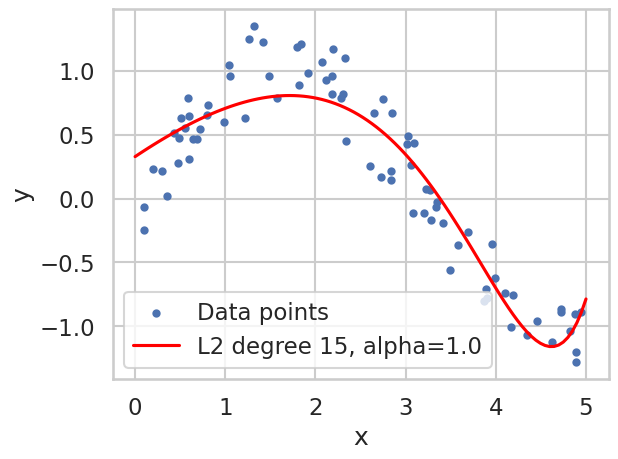

In [ ]:
ridge_model = make_pipeline(PolynomialFeatures(15),
                            StandardScaler(),
                            Ridge(alpha=1.0))
ridge_model.fit(X, y)
y_ridge_pred = ridge_model.predict(X_test)

plt.scatter(X, y, edgecolor='b', s=20, label="Data points")
plt.plot(X_test, y_ridge_pred, color="red", label="L2 degree 15, alpha=1.0")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Grid Search for L2 Regularization

We can use grid search to find the best value of α.

Best alpha: 0.00428, CV-MSE: 0.0912


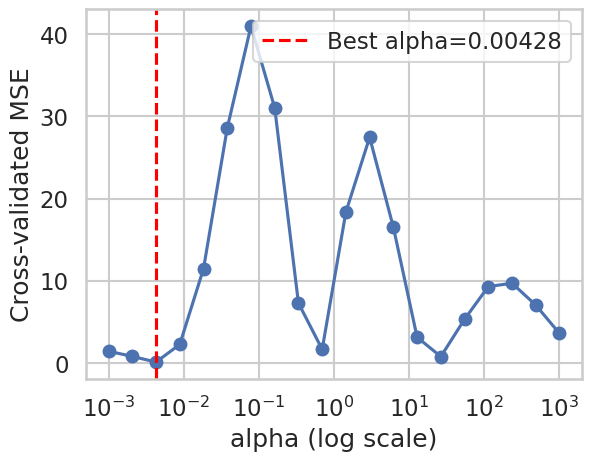

In [ ]:
alphas = np.logspace(-3, 3, 20)
mean_mse = []

for a in alphas:
    ridge_model = make_pipeline(
        PolynomialFeatures(15, include_bias=False),
        StandardScaler(),
        Ridge(alpha=a)
    )
    # 5-fold CV with MSE
    scores = cross_val_score(ridge_model, X, y, scoring="neg_mean_squared_error", cv=5)
    mean_mse.append(-scores.mean())

best_alpha = alphas[np.argmin(mean_mse)]
print(f"Best alpha: {best_alpha:.3g}, CV-MSE: {min(mean_mse):.4f}")

# MSE curve vs alpha
plt.semilogx(alphas, mean_mse, marker="o")
plt.axvline(best_alpha, color="red", linestyle="--", label=f"Best alpha={best_alpha:.3g}")
plt.xlabel("alpha (log scale)")
plt.ylabel("Cross-validated MSE")
plt.legend()
plt.show()

## Binary Classification

We generate synthetic binary classification data and visualize it.

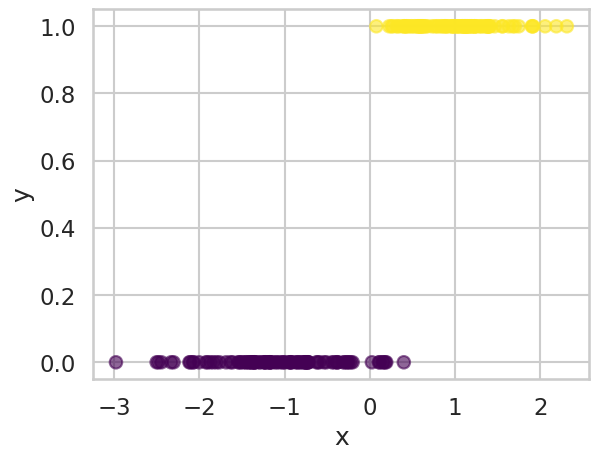

In [ ]:
# Generate data
X, y = make_classification(n_samples=200, n_features=1, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
X = X.flatten()

plt.scatter(X, y, marker='o', c=y, cmap='viridis', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Logistic Regression with scikit-learn

Before implementing logistic regression from scratch, let's see how it looks using scikit-learn.


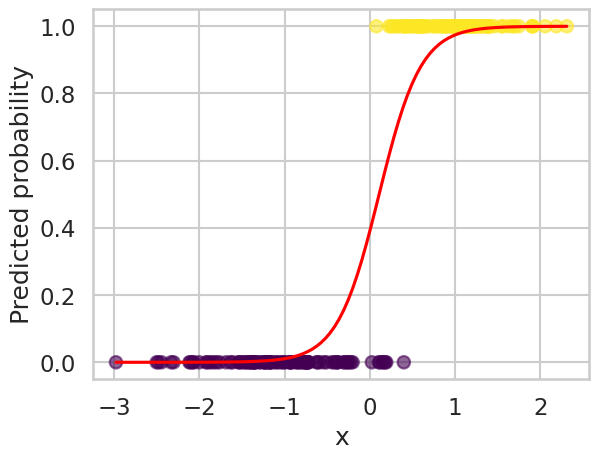

In [ ]:
model = LogisticRegression()
model.fit(X.reshape(-1, 1), y)

x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_values = model.predict_proba(x_values)[:, 1]

plt.scatter(X, y, c=y, cmap='viridis', alpha=0.6)
plt.plot(x_values, y_values, color='red')
plt.xlabel('x')
plt.ylabel('Predicted probability')
plt.show()

### Exercises
- Implement logistic regression from scratch.
- (Only the brave) Implement softmax regression from scratch using the log-sum-exp trick to avoid numerical instability.